# Creating final project for IS685

# I got my dataset from Kaggle

#### I found good datasets, one was larger than 1GB even, but I  could not upload a file bigger than 25MB to github

### I found a dataset about blackFriday, https://www.kaggle.com/mehdidag/black-friday

#### Dataset of 550 000 observations about the black Friday in a retail store, it contains different kinds of variables either numerical or categorical. It contains missing values.

#### I will use BlackFriday CSV file, 538k x 12

#### added an extra column called Gender2. Female = 1, Male = 0

In [1]:
# improting libraries and other functions that might help in the project
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import pip 
import os

In [2]:
#Reset
pd.reset_option('display.max_columns')

# Load Data
df = pd.read_csv("/Users\Majadly\Documents\GitHub\FinalProject\BlackFriday.csv")
df.head()
df.shape

(537577, 13)

In [3]:
# Missing data
# Found this function on finding missing values on kaggle
# https://www.kaggle.com/dk1304/fa-03-question-10

def nullvalues(data):
    overallnull = data.isnull().sum().sort_values (ascending = False)
    nullpercentage = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    nulldata = pd.concat([overallnull, nullpercentage], axis =1, keys = ['overallnull', 'nullpercentage'])
    return nulldata

print (nullvalues(df))

                            overallnull  nullpercentage
Product_Category_3               373299       69.441029
Product_Category_2               166986       31.062713
Gender2                               0        0.000000
Purchase                              0        0.000000
Product_Category_1                    0        0.000000
Marital_Status                        0        0.000000
Stay_In_Current_City_Years            0        0.000000
City_Category                         0        0.000000
Occupation                            0        0.000000
Age                                   0        0.000000
Gender                                0        0.000000
Product_ID                            0        0.000000
User_ID                               0        0.000000


### we can see about the we have a lot of missing values in product 2 and 3. 
### That is fine, we are not looking at that. This data set shows if people bought more than one product. as we can see everyone in the set bought 1 prodoct at least (that is why we have no missing values there). The rest is not of concern.

### I would like to test gender vs age to see who buys more on blackfriday. and all we need is one product. 

#### if you would like me to work on the missing values I would, i did find the mean and took out that code (i tried the median but i keep getting NaN). But again, it makes sense why these two columns are missing values as there was no second and/or third purchases 

In [4]:
df[df.duplicated('Product_ID', keep = False)].sort_values('Product_ID')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender2
36015,1005555,P00000142,M,0-17,10,B,2,0,3,4.0,5.0,10814,0
273508,1000136,P00000142,M,18-25,2,B,3,0,3,4.0,5.0,5401,0
169172,1002073,P00000142,F,18-25,4,B,4+,0,3,4.0,5.0,13581,1
303130,1004655,P00000142,F,26-35,1,A,3,0,3,4.0,5.0,13267,1
106598,1004409,P00000142,M,26-35,14,C,1,1,3,4.0,5.0,13608,0
255473,1003437,P00000142,F,26-35,0,C,2,1,3,4.0,5.0,13195,1
45940,1001094,P00000142,F,18-25,0,C,1,0,3,4.0,5.0,10728,1
415524,1003940,P00000142,M,36-45,20,B,3,1,3,4.0,5.0,13416,0
335497,1003676,P00000142,F,36-45,12,B,3,1,3,4.0,5.0,13461,1
335518,1003679,P00000142,M,26-35,4,A,2,0,3,4.0,5.0,10675,0


Above we can see that we get all the columns back, so I can't delete any of them as it will delete every row. This is due to the fact that we do not have any special column that can give has a differnet value for each row
Taking a quick look at the results, we can see that nothing is duplicate in the Produce 1,2,&3. so there is no duploication in the dataset.

In [5]:
# Descriptive statistics for each column
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender2
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853,0.245913
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133,0.430627
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000,0.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000,0.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000,0.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000,0.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000,1.000000


##### As I mentioned earlier, I would like to check gender vs age, lets do an ECDF for each one 
 
###### I tried to do a bee sworm to see how it looks, but kept getting an error :(

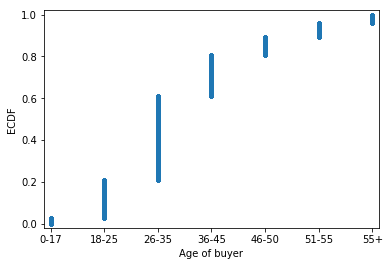

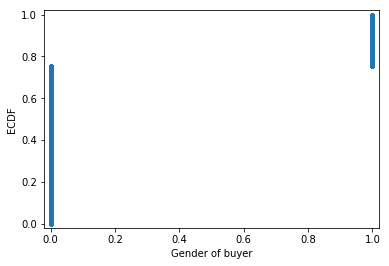

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


# Compute ECDF for Age
x, y = ecdf(df['Age'])

# Generate plot
_ = plt.plot(x, y, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Age of buyer')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# Compute ECDF for Gender
x, y = ecdf(df['Gender2'])

# Generate plot
_ = plt.plot(x, y, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Gender of buyer')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()


Above we can see that most of the people (around 40%) who go on black friday shopping are between the ages of 26-35. 
And that the majority of them are males (of all ages) that count for about 78%

### Given these values I assume that the majority of the buyer between the ages on 26-35 are also males 

## I want to create a model that can predict if the person is male or female depending on the product_1 and and occupation

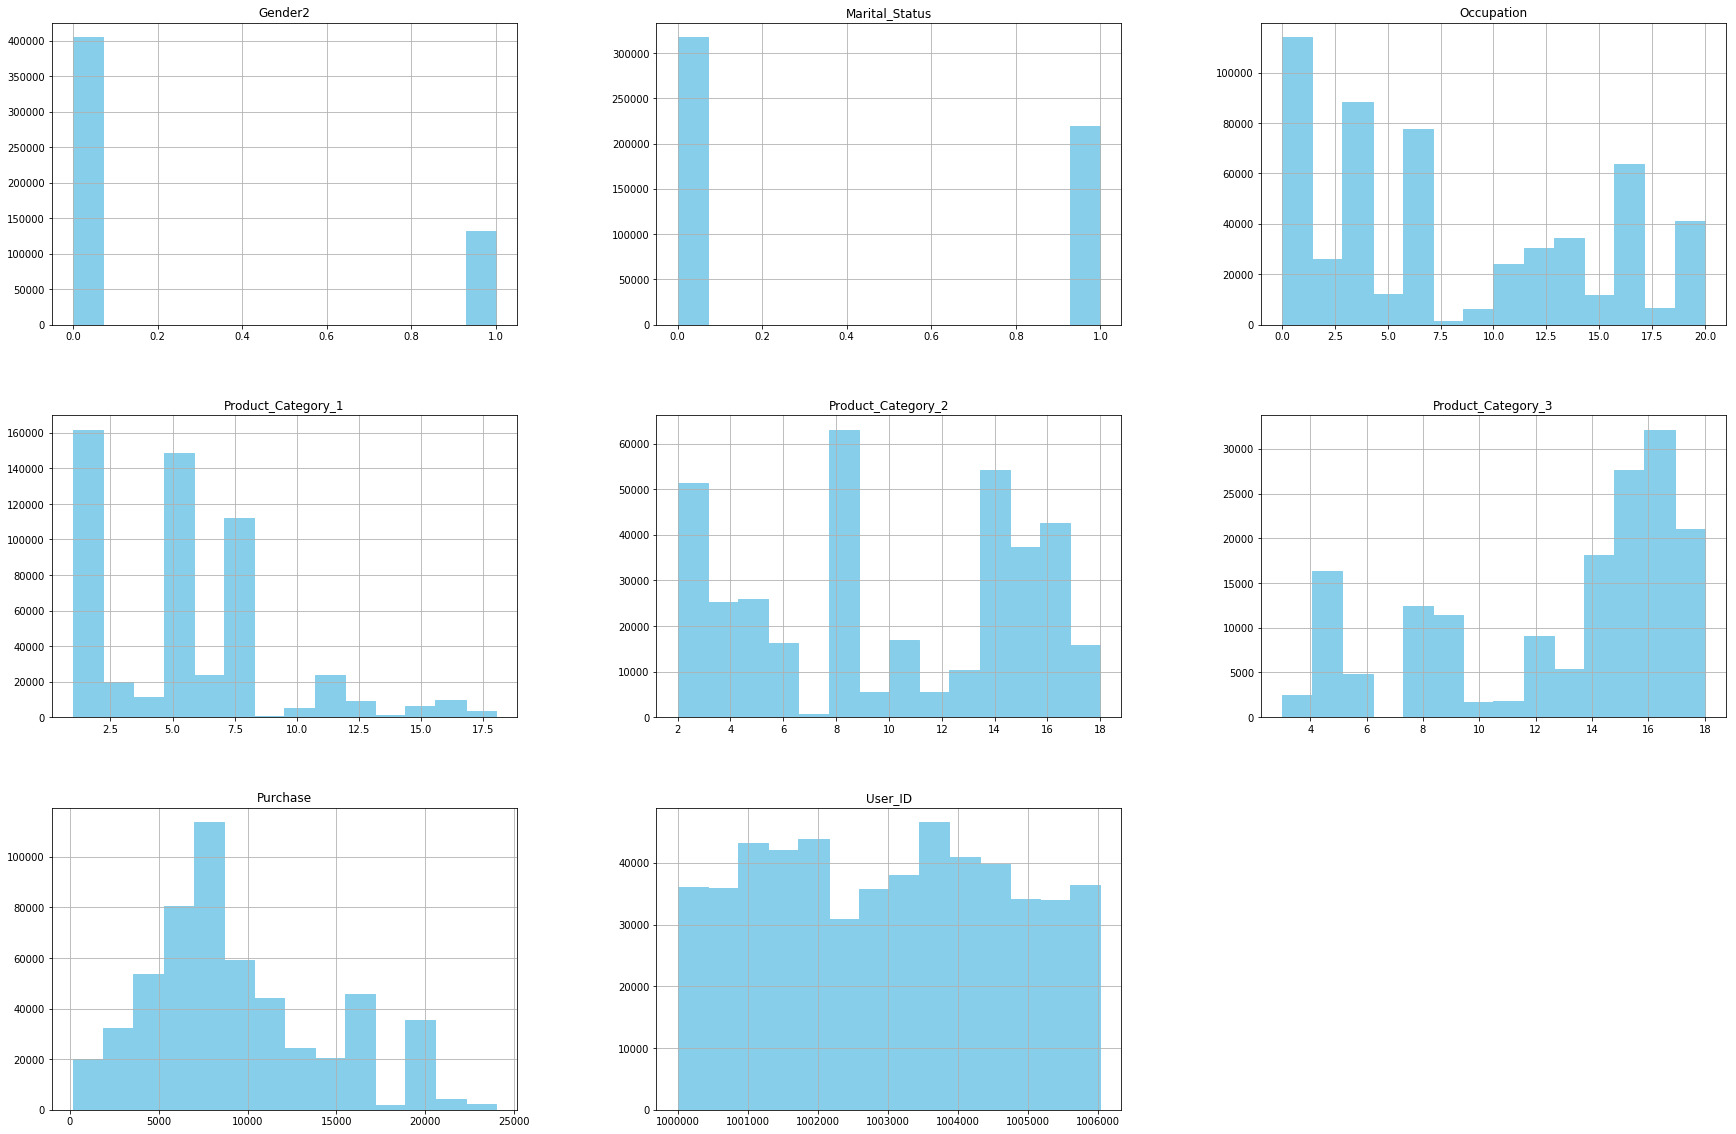

In [8]:
df.hist(bins= 14, color = "skyblue", ec="skyblue", figsize=(30,20))
plt.show()


C:\Users\Majadly\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The skewness of character level is 1.1800840019635614


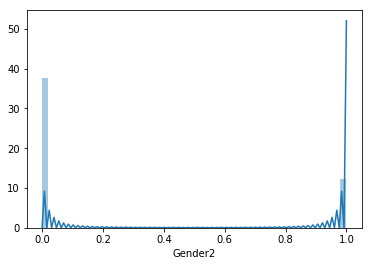

In [7]:
sns.distplot(df['Gender2'])
print ('The skewness of character level is {}'.format(df['Gender2'].skew()))


In [11]:
stats.ttest_ind(df['Product_Category_1'], df['Occupation'])   


Ttest_indResult(statistic=-271.5515182746633, pvalue=0.0)